In [113]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 90)
from IPython.display import HTML
from pathlib import Path as pt
import sklearn as sk

## Regression: Housing Dataset
With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to **predict the final price of each home**.

### What we will learn today:
- Different perspectives on machine learning algorithms
- Model parameters

In [23]:
# We again use the train data from last week:
datapath=pt.cwd()/'data'
raw_df = pd.read_csv(datapath/"train.csv")


In [24]:
# In order to avoid complications, for now we drop some columns and rows
# with missing values.
df = raw_df.drop(['Fence','MiscFeature','PoolQC','Alley','FireplaceQu'],axis=1)
df = df.dropna(subset=['GarageType','GarageYrBlt','GarageFinish','GarageQual','GarageCond'],axis=0)
df = df.dropna(subset=['MasVnrType','MasVnrArea'],axis=0)
df = df.dropna(subset=['BsmtQual','BsmtCond','BsmtFinType1','BsmtExposure','BsmtFinType2'],axis=0)
df = df.dropna(subset=['Electrical'],axis=0)
df.LotFrontage=df.LotFrontage.fillna(np.mean(df.LotFrontage))
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [25]:
# Additionally, we will only keep a few columns in order to keep a better overview.
keep=['SalePrice', 'YearBuilt', 'YrSold', 'MoSold', 'OverallQual', 'OverallCond', 'GrLivArea', 'LotFrontage', 'LotArea', 'GarageArea', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces']
df=df[keep]
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SalePrice,1338.0,186761.782511,78913.847668,35311.0,135000.0,168500.000000,220000.00,755000.0
YearBuilt,1338.0,1973.029148,29.563540,1880.0,1956.0,1976.000000,2001.00,2010.0
YrSold,1338.0,2007.805680,1.330691,2006.0,2007.0,2008.000000,2009.00,2010.0
MoSold,1338.0,6.331839,2.699437,1.0,5.0,6.000000,8.00,12.0
OverallQual,1338.0,6.219731,1.324472,2.0,5.0,6.000000,7.00,10.0
OverallCond,1338.0,5.596413,1.078124,2.0,5.0,5.000000,6.00,9.0
GrLivArea,1338.0,1537.585202,520.579960,438.0,1160.0,1480.000000,1791.50,5642.0
LotFrontage,1338.0,70.759598,22.159883,21.0,60.0,70.759598,80.00,313.0
LotArea,1338.0,10706.294469,10336.621126,1300.0,7744.0,9600.000000,11760.75,215245.0
GarageArea,1338.0,501.449925,186.761863,160.0,377.5,484.000000,583.00,1418.0


In [26]:
# Additionally, instead of working with the SalePrice we will compute it's
# logarithm and work with this.
df['SalePriceLog'] = np.log(df.SalePrice)
df.drop('SalePrice', axis=1)

,YearBuilt,YrSold,MoSold,OverallQual,OverallCond,GrLivArea,LotFrontage,LotArea,GarageArea,FullBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,SalePriceLog
0,2003,2008,2,7,5,1710,65.000000,8450,548,2,3,8,0,12.247694
1,1976,2007,5,6,8,1262,80.000000,9600,460,2,3,6,1,12.109011
2,2001,2008,9,7,5,1786,68.000000,11250,608,2,3,6,1,12.317167
3,1915,2006,2,7,5,1717,60.000000,9550,642,1,3,7,1,11.849398
4,2000,2008,12,8,5,2198,84.000000,14260,836,2,4,9,1,12.429216
5,1993,2009,10,5,5,1362,85.000000,14115,480,1,1,5,0,11.870600
6,2004,2007,8,8,5,1694,75.000000,10084,636,2,3,7,1,12.634603
7,1973,2009,11,7,6,2090,70.759598,10382,484,2,3,7,2,12.206073
8,1931,2008,4,7,5,1774,51.000000,6120,468,2,2,8,2,11.774520
9,1939,2008,1,5,6,1077,50.000000,7420,205,1,2,5,2,11.678440


### Predicting the SalePriceLog
In the lecture we have discussed several ideas, on how we can predict the price
of a new house.
- Using the average across all houses
- Using the mean for categories, i.e. mean of houses with 1, 2, ... rooms
- Using Linear Regression
- Using the price of the house most similar to our house.

-> All those ideas lead us to different machine learning algorithms.

**Additionally** we discussed how we can measure how good our model is.
We defined a function `mse` that allows us to measure the quality of our model.
We can now go ahead and compare the different ideas

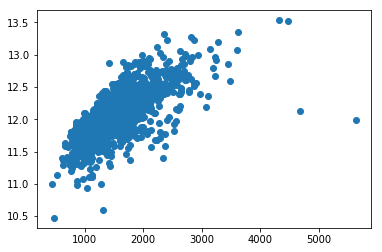

In [30]:
# Ex 1:
# Plot the relationship between 'GrLivArea' and 'SalePriceLog'
plt.plot(df['GrLivArea'],df['SalePriceLog'],'o')

In [32]:
# Ex 2:
# Compute the mean 'SalePriceLog' and save it to a variable 
# mean_price
mean_price=df['SalePriceLog'].mean()
mean_price

12.06349175128546

In [37]:
# Ex 3:
# Define a 'mse' function and compute the mse of using the *mean_price*
def mse(x):
    diff=np.mean(np.square(x-mean_price))
    return diff
mse(df['SalePriceLog'])

0.14190840048230538

### Mean in groups
We can compute the mean in different groups in order to try to improve our prediction:

In [176]:
# Ex 4:
# Group by 'TotRmsAbvGrd' and compute the mean of each group.
# Use this as a prediction, and compute the 'mse' of this prediction.
d=df.groupby('TotRmsAbvGrd').transform('mean')
mse(d)

SalePrice       3.683845e+10
YearBuilt       3.845409e+06
YrSold          3.982987e+06
MoSold          3.292709e+01
OverallQual     3.450998e+01
OverallCond     4.183580e+01
GrLivArea       2.513609e+06
LotFrontage     3.499604e+03
LotArea         1.188965e+08
GarageArea      2.445242e+05
FullBath        1.100925e+02
BedroomAbvGr    8.489317e+01
Fireplaces      1.303456e+02
SalePriceLog    4.442191e-02
dtype: float64

In [177]:
# Ex 5:
# Group by 'TotRmsAbvGrd', 'YearBuilt' and compute the mean of each group.
# Use this as a prediction, and compute the 'mse' of this prediction.
df.groupby(['TotRmsAbvGrd','YearBuilt']).mean()
mse(df.groupby(['TotRmsAbvGrd','YearBuilt']).transform('mean'))

SalePrice       3.973174e+10
YrSold          3.982988e+06
MoSold          3.533844e+01
OverallQual     3.548246e+01
OverallCond     4.244864e+01
GrLivArea       2.558827e+06
LotFrontage     3.700143e+03
LotArea         1.588883e+08
GarageArea      2.604135e+05
FullBath        1.102279e+02
BedroomAbvGr    8.506076e+01
Fireplaces      1.304999e+02
SalePriceLog    1.106493e-01
dtype: float64

### Using linear models

In [183]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [226]:
y = df.SalePriceLog
X = df['GrLivArea'].values.reshape(-1, 1)
S=  df[['GarageArea','LotArea','MoSold']].values

In [227]:
# Ex 6: Implement linear regression and print out the coefficients.
# See https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
model= LinearRegression()
model.fit(X,y)
#model.intercept_
model.coef_

array([0.00051016])

In [228]:
# Ex 7: Predict the price using the fitted coefficients
x=model.coef_*X+model.intercept_
x
#mse(x)
#np.log(mse(x))

array([[12.15145105],
       [11.92289894],
       [12.19022329],
       ...,
       [12.47285246],
       [11.82902932],
       [11.91983797]])

In [229]:
# Ex 8: Use the predict method from the fitted LinearRegression:
yso=model.predict(X)
mse(yso)

0.07047979660994458

In [230]:
# Ex 9: Fit a linear regression using 3 variables of your choice,
#       Compute the mse for this model
model.fit(S,y)
y_pred=model.predict(S)
mse(y_pred)

0.05666268572770825

In [237]:
# Ex 10: Fit a DecisionTreeRegressor instead of a LinearRegression
# The API is exactly the same as above!
# See: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
mde=DecisionTreeRegressor('mse')
mde.fit(X,y)
ypre=mde.predict(X)
mse(ypre)

0.12325710910467096

In [242]:
mde=DecisionTreeRegressor('mae')
mde.fit(S,y)
ypre=mde.predict(S)
mse(ypre)
mde.decision_path(S)

<1338x2633 sparse matrix of type '<class 'numpy.int64'>'
	with 21369 stored elements in Compressed Sparse Row format>

### Open Questions:

- Is the `mse` we computed a reliable measure of how good our model performs?

    **-> No, we need to split our data into train and test**
    
    **-> Overfitting**
    
---
- How do we choose which variables to use?

    **-> Regularization**
    
    **-> Prevent Overfitting**

---
- What to _Parameters_ in the sklearn documentation do?

    **-> Hyperparameters**

---
- What do we do if we want to predict discrete variables?

    **-> Classification**
    
---
- How can we deal with **missing values**, **categorical variables**

    **-> Preprocessing and Feature Engineering**


## Homework: 

### 1.
Watch the following videos on the "Open Questions":
- Train / Test Split: https://www.youtube.com/watch?v=_2ij6eaaSl0
- DecisionTree: https://www.youtube.com/watch?v=6ENTbK3yQUQ
- Regularization: https://www.youtube.com/watch?v=u73PU6Qwl1I
- Mean Squared Error: https://www.youtube.com/watch?v=VusKAosxxyk

If there is anything you did not understand, please note it down and ask in the next lecture.

- Is the `mse` on our train data reliably telling us how good our model is?
- Why do we need a train/test split?
- What is the idea behind a decision tree
- What is the aim of regularization. Name ways on how we can regularize a DecisionTree / Linear Model
- Read the documentation for `DecisionTreeRegressor`. Which hyperparameters does it have?
- What is the Bias-Variance Tradeoff

### 2.
Find out how you can use `sklearn.model_selection.train_test_split` to split your data.
Implement a Linear Regression and a DecisionTreeRegressor, compare their training and test `mse`. 